In [15]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

from xgboost import plot_importance
from helper import util_three_class
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt
import xgboost as xgb

# 0. Train on types & count based

In [4]:
# train file name
train_file = '/path/to/9_FINAL/data/machine_learning/count_based/three_class/train/downsampled_to_types/train_0.csv'

In [5]:
# get x and y of train
X_train, y_train = util_three_class.read_file_and_drop_columns(train_file, 
                                                               ['instance', 'class', 'id', 'pids'])

In [6]:
# initialize Naive Bayes
nb = MultinomialNB()

In [7]:
# fit model on X_train
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 1. Predict on Test

In [8]:
# get test
test = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv', 
                   sep=";", index_col=0)

In [7]:
# get head
test.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
66788,classics,publisher,10,4,9,184535989,"['p3a', 'p1', 'p3a', 'p1', 'p5', 'p5', 'p1', '...",3,0,0,...,0,0,3,0,0,0,0,0,0,2
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,0,0,2,0,0,0,0,0,0,2
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,2
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,0,1,0,0,0,7,4,1,0,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,0,0,1,0,0,0,1,0,0,2


In [8]:
# sanity check for labels
test.label.value_counts()

2    342108
1      5823
0       190
Name: label, dtype: int64

In [9]:
# test path
test_path = '/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv'

In [10]:
# predict on test
X_test, y_test = util_three_class.read_file_and_drop_columns(test_path, 
                                                               ['instance', 'class', 'id', 'pids'])

In [11]:
# sanity check
X_test

,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,p13,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
66788,10,4,9,3,0,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0
310672,4,2,4,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
13527,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58070,13,4,12,0,0,0,0,0,0,0,...,0,0,1,0,0,0,7,4,1,0
71702,2,2,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159151,14,4,13,0,0,0,0,0,0,0,...,0,0,0,2,0,0,7,2,0,0
141128,7,3,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
227194,8,8,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
328857,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# predict on test
predict_test = nb.predict(X_test)

# 2. Get metrics on test

In [13]:
# get f1_score on test set
f1_score(y_test, predict_test, average='macro')

0.35642519991499566

In [14]:
# get confusion matrix 
confusion_matrix(y_test, predict_test)

array([[    33,     38,    119],
       [    86,    764,   4973],
       [  1423,  16643, 324042]])

In [15]:
# get all correctly classified indices
test_all = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/three_class/test.csv', 
                   sep=";", index_col=0)
test_all['Prediction'] = predict_test

# 3. Correctly classified

In [16]:
# show all instances where subclass prediction and actual are the same
subclasses_right=test_all[(test_all['label'] == 0) & (test_all['Prediction'] == 0)]
subclasses_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
348120,zebra,species,432,23,333,225199835,"['p6p5p4p1p10p20bp3a', 'p5p23cp23dp2p1p8ap3a',...",27,2,0,...,0,90,1,0,14,3,15,0,0,0
348040,distributor,agent,162,8,74,414096733,"['p36p5p4p1p20dp8ap3a', 'p4', 'p8a', 'p1p8a', ...",12,0,0,...,0,7,0,0,10,0,0,0,0,0
347947,burglar,criminal,157,9,119,47909601,"['p5p4p23dp2p1p8ap3a', 'p4', 'p1p8b', 'p3a', '...",25,0,0,...,0,8,0,0,2,3,0,0,0,0
347944,boxing,sport,4490,47,1892,117501051,['p7p6p5p4p2p1p43p26p15ap25p15bp24p20cp20bp20d...,102,13,11,...,3,221,3,2,757,119,3,5,0,0
348019,detector,sensor,1663,30,252,480267258,"['p26p16p5p34p4p1p10p3a', 'p16p5p4p1p8ap28bp3a...",69,4,0,...,0,348,0,0,289,2,3,0,0,0
347980,museum,building,2549,42,1541,104361281,['p5p4p2p1p10p12ap8ap8cp8bp21ap22ap23ep23ap21c...,183,14,1,...,1,351,1,2,633,38,5,0,0,0
348018,macaw,bird,381,22,260,202818911,"['p5p4p23dp2p1p25p21dp20dp8ap28bp3a', 'p5p4p23...",39,2,0,...,0,57,0,0,54,2,2,0,0,0
347950,child,person,8557,44,3480,162337557,['p7p6p5p4p2p1p43p26p15ap25p15bp24p20cp20bp20d...,153,23,1,...,17,164,38,1,613,131,21,8,0,0
348061,judge,person,1328,30,667,158184735,['p6p5p4p2p1p10p8ap8bp43p36p26p16p13p23ap25p23...,56,25,1,...,5,39,12,0,132,51,5,0,0,0
348107,synagogue,place,1026,19,617,16354862,"['p6p5p4p1p8ap27bp3a', 'p6p26p5p4p1p23ap23bp8a...",71,0,0,...,0,26,2,0,80,41,11,2,0,0


In [17]:
# get unique words 
subclasses_right['class'].value_counts()

place             7
species           3
building          3
person            3
work              3
agent             2
sport             1
sensor            1
website           1
reptile           1
food              1
book              1
group             1
drug              1
infrastructure    1
bird              1
criminal          1
road              1
Name: class, dtype: int64

In [18]:
# get count of all used pids per row
count_subclasses_right = subclasses_right.drop(columns=['instance', 'class', 'frequency', 
                                                        'pidspread', 'pldspread', 'id', 'pids',
                                                       'Prediction', 'label']).sum()
count_subclasses_right = pd.DataFrame(count_subclasses_right).reset_index().sort_values(by=0, ascending=False)
count_subclasses_right.columns = ['pid', 'counts']
n_subclasses = count_subclasses_right.counts.sum()

In [19]:
# get top three observations and get fraction
count_subclasses_right = count_subclasses_right.iloc[:3,]
count_subclasses_right['percentage'] = count_subclasses_right['counts']/n_subclasses
count_subclasses_right.loc[3] = ['rest', n_subclasses-count_subclasses_right['counts'].sum(),
                                1-count_subclasses_right['percentage'].sum()]
count_subclasses_right['percentage'] = count_subclasses_right['percentage']*100

In [20]:
# sanity check
count_subclasses_right

,pid,counts,percentage
54,p8a,11504,33.617767
47,p3a,5185,15.151958
51,p5,4661,13.620690
3,rest,12870,37.609585


In [21]:
count_subclasses_right.index = count_subclasses_right.pid
count_subclasses_right

,pid,counts,percentage
pid,,,
p8a,p8a,11504,33.617767
p3a,p3a,5185,15.151958
p5,p5,4661,13.620690
rest,rest,12870,37.609585


In [22]:
# show all instances where types prediction and actual are the same
types_right=test_all[(test_all['label'] == 1) & (test_all['Prediction'] == 1)]
types_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
343151,acetone,product,87,13,58,438897111,"['p5p23ep4p23dp1p25p8ap20ap3a', 'p5p3a', 'p5',...",10,0,0,...,1,23,0,0,17,0,0,0,1,1
346611,socialism,movement,311,18,203,411869062,"['p5p1p10p8ap8bp3a', 'p5p8ap8bp3a', 'p10p8ap8b...",17,10,1,...,1,40,0,0,57,47,0,0,1,1
347473,paveway,bomb,11,3,11,74204520,"['p5p1p8a', 'p5', 'p8a', 'p5', 'p8a', 'p8a', '...",1,0,0,...,0,4,0,0,5,0,0,0,1,1
345337,leicestershire,place,10,3,5,131211868,"['p5p1', 'p16', 'p1', 'p16', 'p5', 'p16']",2,0,0,...,0,2,0,0,0,0,0,0,1,1
342558,lactulose,laxative,90,9,70,413339434,"['p5p4p1p25p8ap3a', 'p5p8ap27a', 'p5', 'p5p8a'...",1,0,0,...,0,9,0,0,10,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345785,ncsy,group,5,1,5,85612753,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,4,0,0,0,0,0,0,1,1
342135,acetylacetone,ligand,7,1,4,53333662,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,4,0,0,0,0,0,0,1,1
344006,cumin,herb,155,15,126,203714309,"['p6p5p4p2p1p8ap8bp16p23dp23ap25p23bp3a', 'p3a...",10,0,0,...,0,17,1,0,15,2,1,0,1,1
342592,methanethiol,thiol,5,2,5,68294175,"['p5p25', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,1,1


In [23]:
# get distinct words for class in wrongly classified in stances
types_right['class'].value_counts()[:10]

place           61
species         39
name            36
organization    25
town            17
film            17
work            15
brand           15
software        13
animal          12
Name: class, dtype: int64

In [24]:
# get count of all used pids per row
count_types_right = types_right.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_types_right = pd.DataFrame(count_types_right).reset_index().sort_values(by=0, ascending=False)
count_types_right.columns = ['pid', 'counts']
n_types = count_types_right.counts.sum()

In [25]:
# get top three observations and get fraction
count_types_right = count_types_right.iloc[:3,]
count_types_right['percentage'] = count_types_right['counts']/n_types
count_types_right.loc[3] = ['rest', n_types-count_types_right['counts'].sum(),
                                1-count_types_right['percentage'].sum()]
count_types_right['percentage'] = count_types_right['percentage']*100

In [26]:
count_types_right.index = count_types_right.pid
count_types_right

,pid,counts,percentage
pid,,,
p8a,p8a,11196,32.860791
p5,p5,7810,22.922720
p3a,p3a,3365,9.876435
rest,rest,11700,34.340055


In [27]:
# show all instances where negatives prediction and actual are the same
negatives_right=test_all[(test_all['label'] == 2) & (test_all['Prediction'] == 2)]
negatives_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,2,2
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,1,0,0,0,7,4,1,0,2,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,0,1,0,0,0,1,0,0,2,2
74022,durum,meal,1,1,1,205352395,['p26'],0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168207,lager,prison,1,1,1,156582356,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
159151,kaleidoscope,album,14,4,13,68064313,"['p5', 'p8a', 'p8a', 'p3a', 'p8a', 'p8a', 'p8b...",0,0,0,...,0,2,0,0,7,2,0,0,2,2
141128,hominy,type,7,3,7,500423263,"['p2p8ap3a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,4,0,0,0,2,2
227194,peak,protein,8,8,7,6458294,"['p25', 'p38', 'p1', 'p28d', 'p8a', 'p23a', 'p...",1,0,0,...,0,0,0,0,1,1,0,0,2,2


In [28]:
negatives_right['class'].value_counts()[:10]

member     2014
number     1806
part       1781
thing      1554
group      1450
man        1430
company    1305
type       1239
year       1216
name       1212
Name: class, dtype: int64

In [29]:
# get count of all used pids per row
count_negatives_right = negatives_right.drop(columns=['instance', 'class', 'frequency', 
                                                      'pidspread', 'pldspread', 'id', 'pids',
                                                     'Prediction', 'label']).sum()
count_negatives_right = pd.DataFrame(count_negatives_right).reset_index().sort_values(by=0, ascending=False)
count_negatives_right.columns = ['pid', 'counts']
n_negatives = count_negatives_right.counts.sum()

In [30]:
# get top three observations and get fraction
count_negatives_right = count_negatives_right.iloc[:3,]
count_negatives_right['percentage'] = count_negatives_right['counts']/n_negatives
count_negatives_right.loc[3] = ['rest', n_negatives-count_negatives_right['counts'].sum(),
                                1-count_negatives_right['percentage'].sum()]
count_negatives_right['percentage'] = count_negatives_right['percentage']*100

In [31]:
count_negatives_right.index = count_negatives_right.pid
count_negatives_right

,pid,counts,percentage
pid,,,
p8a,p8a,644583,31.787965
p3a,p3a,244792,12.072052
p8b,p8b,182735,9.011677
rest,rest,955648,47.128306


# 4. Wrongly classified

In [32]:
# show all instances where subclass prediction and actual are not the same
subclasses_not_right=test_all[(test_all['label'] == 0) & (test_all['Prediction'] != 0)]
subclasses_not_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
348097,senator,person,236,20,128,274223657,"['p5p4p2p1p10p8ap8bp26p25p20cp20ap28bp3a', 'p3...",13,5,0,...,3,6,3,0,36,9,0,1,0,1
347979,moped,motorcycle,34,8,27,258845408,"['p5p25p8ap3a', 'p3a', 'p37', 'p4', 'p3a', 'p1...",2,0,0,...,0,1,0,0,3,0,1,0,0,2
348108,teal,animal,4,4,4,310676819,"['p8a', 'p23d', 'p3a', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,0,2
348112,trojan,agent,7,5,6,113916569,"['p8b', 'p20c', 'p3a', 'p8a', 'p8a', 'p16']",0,0,0,...,0,0,0,0,2,1,0,0,0,2
347986,positivist,person,2,1,2,253395561,"['p8a', 'p8a']",0,0,0,...,0,0,0,0,2,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347957,dramaturge,person,1,1,1,256172583,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,0,2
347955,creationist,person,7,5,4,144450668,"['p21a', 'p8a', 'p8a', 'p25', 'p3a', 'p6']",0,0,0,...,0,0,1,0,2,0,0,0,0,2
348083,possum,animal,253,17,198,395042431,"['p7p36p6p5p4p1p8ap8bp3ap43', 'p5p4p1p25p8a', ...",32,0,0,...,2,40,2,1,25,2,2,0,0,1
348048,fountain,work,237,23,169,377665285,"['p5p4p1p10p8ap3a', 'p1p8ap20ap8c', 'p5p1p3a',...",19,4,0,...,0,34,0,0,58,0,2,0,0,1


In [33]:
# get distinct words for class in wrongly classified in stances
subclasses_not_right['class'].value_counts()

person            42
agent             21
species           16
place             14
animal             7
work               6
drug               4
organisation       3
region             2
bird               2
book               2
artist             2
ship               2
disease            2
settlement         2
software           2
eukaryote          2
plant              2
mammal             2
cleric             1
motorcycle         1
aerodrome          1
building           1
ceramist           1
musician           1
movie              1
airport            1
publication        1
band               1
protein            1
jurist             1
weapon             1
event              1
organization       1
sportsperson       1
biomolecule        1
anti-communist     1
watercourse        1
aircraft           1
writer             1
athlete            1
Name: class, dtype: int64

In [34]:
# get count of all used pids per row
count_subclasses_false = subclasses_not_right.drop(columns=['instance', 'class', 'frequency', 
                                                        'pidspread', 'pldspread', 'id', 'pids',
                                                       'Prediction', 'label']).sum()
count_subclasses_false = pd.DataFrame(count_subclasses_false).reset_index().sort_values(by=0, ascending=False)
count_subclasses_false.columns = ['pid', 'counts']
n_subclasses_false = count_subclasses_false.counts.sum()

In [35]:
# get top three observations and get fraction
count_subclasses_false = count_subclasses_false.iloc[:3,]
count_subclasses_false['percentage'] = count_subclasses_false['counts']/n_subclasses_false
count_subclasses_false.loc[3] = ['rest', n_subclasses_false-count_subclasses_false['counts'].sum(),
                                1-count_subclasses_false['percentage'].sum()]
count_subclasses_false['percentage'] = count_subclasses_false['percentage']*100

In [36]:
count_subclasses_false.index = count_subclasses_false.pid
count_subclasses_false

,pid,counts,percentage
pid,,,
p8a,p8a,1633,28.454435
p5,p5,874,15.229134
p3a,p3a,768,13.382122
rest,rest,2464,42.934309


In [37]:
# show all instances where types prediction and actual are not the same
types_not_right=test_all[(test_all['label'] == 1) & (test_all['Prediction'] != 1)]
types_not_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
345736,myers,name,75,17,65,197145664,"['p5', 'p20cp8a', 'p10p8a', 'p8a', 'p5', 'p8ap...",1,2,0,...,0,11,0,0,18,5,1,0,1,2
344481,franeker,settlement,1,1,1,182411213,['p4'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
345482,mdvanii,doll,1,1,1,70563818,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
345199,knipex,brand,3,3,3,116570500,"['p8a', 'p4', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,1,2
345310,l'argent,work,3,2,3,379876134,"['p8b', 'p10']",0,1,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347545,retapamulin,antibiotic,1,1,1,312950217,['p15a'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
346355,rooibos,species,1,1,1,438223802,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
343200,aghalaya,place,1,1,1,362182289,['p1'],1,0,0,...,0,0,0,0,0,0,0,0,1,2
347672,paya,agent,1,1,1,93457556,['p8b'],0,0,0,...,0,0,0,0,0,1,0,0,1,2


In [38]:
# get distinct words for class in wrongly classified in stances
types_not_right['class'].value_counts()[:10]

place           704
name            257
species         219
work            203
town            188
company         153
organization    141
group           119
city            111
person          101
Name: class, dtype: int64

In [39]:
# get count of all used pids per row
count_types_false = types_not_right.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_types_false = pd.DataFrame(count_types_false).reset_index().sort_values(by=0, ascending=False)
count_types_false.columns = ['pid', 'counts']
n_types_false = count_types_false.counts.sum()

In [40]:
# get top three observations and get fraction
count_types_false = count_types_false.iloc[:3,]
count_types_false['percentage'] = count_types_false['counts']/n_types_false
count_types_false.loc[3] = ['rest', n_types_false-count_types_false['counts'].sum(),
                                1-count_types_false['percentage'].sum()]
count_types_false['percentage'] = count_types_false['percentage']*100

In [41]:
count_types_false.index = count_types_false.pid
count_types_false

,pid,counts,percentage
pid,,,
p8a,p8a,28719,29.024923
p5,p5,20020,20.233259
p3a,p3a,11595,11.718513
rest,rest,38612,39.023306


In [42]:
negatives_not_right = test_all[(test_all['label'] == 2) & (test_all['Prediction'] != 2)]
negatives_not_right

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
66788,classics,publisher,10,4,9,184535989,"['p3a', 'p1', 'p3a', 'p1', 'p5', 'p5', 'p1', '...",3,0,0,...,0,3,0,0,0,0,0,0,2,1
318295,tyack,part,17,1,17,204734476,['p12a'],0,0,0,...,0,0,0,0,0,0,0,0,2,1
326888,voltaire,rationalist,10,3,10,83802152,"['p5', 'p2', 'p5', 'p5', 'p5', 'p1', 'p5']",1,0,0,...,0,5,0,0,0,0,0,0,2,1
258647,ribose,nutrient,19,3,7,106070290,"['p8a', 'p8a', 'p8a', 'p1', 'p20c', 'p8a', 'p8a']",1,0,0,...,0,0,0,0,5,0,0,0,2,1
143483,ibm,sale,47,5,40,249707698,"['p5p8cp3a', 'p3a', 'p5', 'p5', 'p5', 'p3a', '...",0,0,0,...,0,10,0,0,1,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284499,source,route,184,19,52,118630135,"['p20ap3a', 'p8d', 'p21a', 'p27b', 'p5', 'p27b...",3,0,0,...,0,5,0,0,13,3,0,1,2,1
4464,m2,integer,138,2,12,31049257,"['p8a', 'p8ap8c', 'p8a', 'p8a', 'p8a', 'p8a', ...",0,0,0,...,0,0,0,0,37,0,2,0,2,0
105513,feedback,food,7,1,1,384631400,['p1'],1,0,0,...,0,0,0,0,0,0,0,0,2,1
103922,fantom,project,2,1,2,444688527,"['p5', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,2,1


In [43]:
negatives_not_right['class'].value_counts()[:10]

product     205
material    192
type        182
system      168
tool        166
artist      153
activity    151
device      149
program     143
company     138
Name: class, dtype: int64

In [44]:
# get count of all used pids per row
count_negatives_false = negatives_not_right.drop(columns=['instance', 'class', 'frequency', 
                                              'pidspread', 'pldspread', 'id', 'pids',
                                             'Prediction', 'label']).sum()
count_negatives_false = pd.DataFrame(count_negatives_false).reset_index().sort_values(by=0, ascending=False)
count_negatives_false.columns = ['pid', 'counts']
n_negatives_false = count_negatives_false.counts.sum()

In [45]:
# get top three observations and get fraction
count_negatives_false = count_negatives_false.iloc[:3,]
count_negatives_false['percentage'] = count_negatives_false['counts']/n_negatives_false
count_negatives_false.loc[3] = ['rest', n_negatives_false-count_negatives_false['counts'].sum(),
                                1-count_negatives_false['percentage'].sum()]
count_negatives_false['percentage'] = count_negatives_false['percentage']*100

In [46]:
count_negatives_false.index = count_negatives_false.pid
count_negatives_false

,pid,counts,percentage
pid,,,
p8a,p8a,256040,26.667778
p5,p5,198777,20.703565
p3a,p3a,148594,15.476768
rest,rest,356699,37.151889


# 5. Overall

In [47]:
test_all[test_all['label'] == 0]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
348097,senator,person,236,20,128,274223657,"['p5p4p2p1p10p8ap8bp26p25p20cp20ap28bp3a', 'p3...",13,5,0,...,3,6,3,0,36,9,0,1,0,1
347979,moped,motorcycle,34,8,27,258845408,"['p5p25p8ap3a', 'p3a', 'p37', 'p4', 'p3a', 'p1...",2,0,0,...,0,1,0,0,3,0,1,0,0,2
348108,teal,animal,4,4,4,310676819,"['p8a', 'p23d', 'p3a', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,0,2
348112,trojan,agent,7,5,6,113916569,"['p8b', 'p20c', 'p3a', 'p8a', 'p8a', 'p16']",0,0,0,...,0,0,0,0,2,1,0,0,0,2
348120,zebra,species,432,23,333,225199835,"['p6p5p4p1p10p20bp3a', 'p5p23cp23dp2p1p8ap3a',...",27,2,0,...,0,90,1,0,14,3,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347955,creationist,person,7,5,4,144450668,"['p21a', 'p8a', 'p8a', 'p25', 'p3a', 'p6']",0,0,0,...,0,0,1,0,2,0,0,0,0,2
348083,possum,animal,253,17,198,395042431,"['p7p36p6p5p4p1p8ap8bp3ap43', 'p5p4p1p25p8a', ...",32,0,0,...,2,40,2,1,25,2,2,0,0,1
348048,fountain,work,237,23,169,377665285,"['p5p4p1p10p8ap3a', 'p1p8ap20ap8c', 'p5p1p3a',...",19,4,0,...,0,34,0,0,58,0,2,0,0,1
347959,dinosaur,reptile,278,18,202,341897924,"['p7p5p4p2p1p11p28ap8ap28bp28cp8bp3a', 'p4p1p8...",57,0,1,...,1,12,0,1,4,3,0,0,0,0


In [48]:
# show all instances where subclass prediction and actual are not the same
test_all[test_all['label'] == 0]['class'].value_counts()

person            45
agent             23
place             21
species           19
work               9
animal             7
drug               5
building           4
bird               3
organisation       3
book               3
mammal             2
plant              2
region             2
settlement         2
software           2
disease            2
eukaryote          2
artist             2
ship               2
biomolecule        1
road               1
cleric             1
sport              1
sportsperson       1
airport            1
protein            1
infrastructure     1
motorcycle         1
musician           1
event              1
aircraft           1
website            1
watercourse        1
band               1
anti-communist     1
organization       1
weapon             1
food               1
athlete            1
publication        1
writer             1
aerodrome          1
movie              1
sensor             1
jurist             1
criminal           1
reptile      

In [49]:
test_all[test_all['label'] == 1]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
345736,myers,name,75,17,65,197145664,"['p5', 'p20cp8a', 'p10p8a', 'p8a', 'p5', 'p8ap...",1,2,0,...,0,11,0,0,18,5,1,0,1,2
344481,franeker,settlement,1,1,1,182411213,['p4'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
345482,mdvanii,doll,1,1,1,70563818,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
345199,knipex,brand,3,3,3,116570500,"['p8a', 'p4', 'p5']",0,0,0,...,0,1,0,0,1,0,0,0,1,2
345310,l'argent,work,3,2,3,379876134,"['p8b', 'p10']",0,1,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347545,retapamulin,antibiotic,1,1,1,312950217,['p15a'],0,0,0,...,0,0,0,0,0,0,0,0,1,2
346355,rooibos,species,1,1,1,438223802,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,1,2
343200,aghalaya,place,1,1,1,362182289,['p1'],1,0,0,...,0,0,0,0,0,0,0,0,1,2
347672,paya,agent,1,1,1,93457556,['p8b'],0,0,0,...,0,0,0,0,0,1,0,0,1,2


In [50]:
# show all instances where subclass prediction and actual are not the same
test_all[test_all['label'] == 1]['class'].value_counts()[:10]

place           765
name            293
species         258
work            218
town            205
organization    166
company         164
group           127
city            122
film            114
Name: class, dtype: int64

In [51]:
test_all[test_all['label'] == 2]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction
66788,classics,publisher,10,4,9,184535989,"['p3a', 'p1', 'p3a', 'p1', 'p5', 'p5', 'p1', '...",3,0,0,...,0,3,0,0,0,0,0,0,2,1
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,0,2,0,0,0,0,0,0,2,2
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,1,0,0,0,7,4,1,0,2,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,0,1,0,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168207,lager,prison,1,1,1,156582356,['p8a'],0,0,0,...,0,0,0,0,1,0,0,0,2,2
159151,kaleidoscope,album,14,4,13,68064313,"['p5', 'p8a', 'p8a', 'p3a', 'p8a', 'p8a', 'p8b...",0,0,0,...,0,2,0,0,7,2,0,0,2,2
141128,hominy,type,7,3,7,500423263,"['p2p8ap3a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,0,4,0,0,0,2,2
227194,peak,protein,8,8,7,6458294,"['p25', 'p38', 'p1', 'p28d', 'p8a', 'p23a', 'p...",1,0,0,...,0,0,0,0,1,1,0,0,2,2


In [52]:
# show all instances where subclass prediction and actual are not the same
test_all[test_all['label'] == 2]['class'].value_counts()[:10]

member     2117
number     1889
part       1850
thing      1645
group      1559
man        1457
company    1443
type       1421
name       1346
product    1330
Name: class, dtype: int64

# 6. Display charts

In [53]:
# stack data for visualization
data_to_visualize = [count_subclasses_right,
                    count_types_right,
                    count_negatives_right,
                     count_subclasses_false,
                     count_types_false,
                     count_negatives_false]

In [54]:
# titles
titles = ['Subclasses - Correct', 'Types - Correct', 'Negatives - Correct',
         'Subclasses - Wrong', 'Types - Wrong', 'Negatives - Wrong']

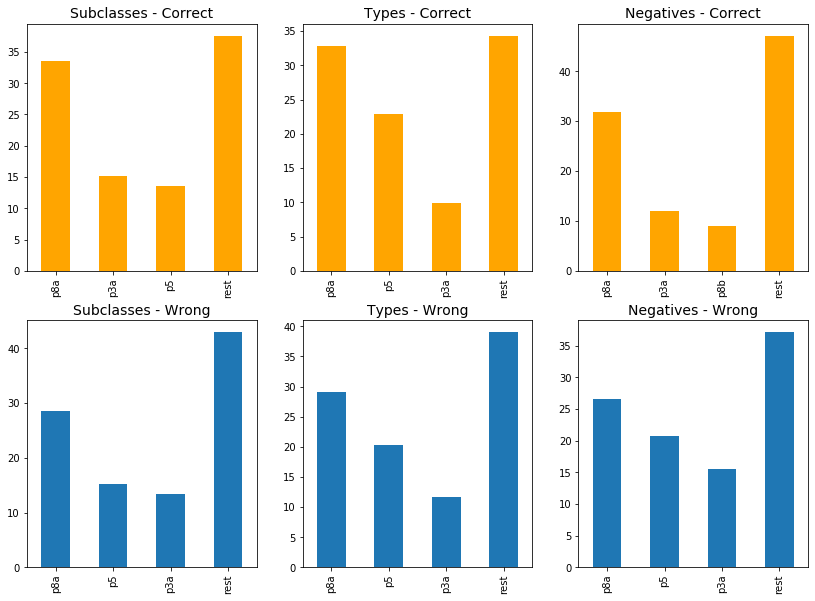

In [55]:
fig, axs = plt.subplots(2,3, figsize=(14,10))

counter = 0


for i in range(2):
    for j in range(3):
        if counter < 3:
            color = 'orange'
        else:
            color = '#1f77b4'
            
        data_to_visualize[counter][['percentage']].plot(ax=axs[i,j], kind='bar', legend=False, color=color)
        axs[i,j].set_title(titles[counter], size=14)
        axs[i,j].set_xlabel('')
        counter += 1

# 7. Train XGBoost

In [9]:
# initialize xgb classifier
xgb_c = xgb.XGBClassifier(random_state=88)
xgb_c.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=88, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

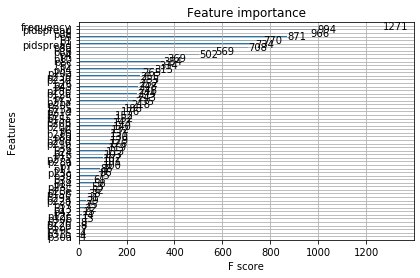

In [16]:
# plot feature importance
plot_importance(xgb_c)

In [19]:
pd.DataFrame(list(xgb_c.get_booster().get_score(importance_type='gain').items()))

,0,1
0,p1,158.308342
1,pidspread,30.296749
2,frequency,10.978671
3,p8a,17.379832
4,p7,10.464326
5,p4,35.471379
6,p24,10.278292
7,p5,28.616580
8,pldspread,17.266555
9,p6,16.931242


In [31]:
# get feature importance
gain_importance = pd.DataFrame(list(xgb_c.get_booster().get_score(importance_type='gain').items()))
gain_importance.columns = ['Feature', 'Gain']
gain_importance.sort_values(by='Gain', ascending=False, inplace=True) 

In [32]:
# only take last 10 elements
gain_importance = gain_importance.iloc[:10, :]

In [33]:
gain_importance

,Feature,Gain
0,p1,158.308342
19,p2,39.284373
5,p4,35.471379
1,pidspread,30.296749
7,p5,28.616580
11,p10,24.726639
10,p43,23.063945
12,p34,19.843990
28,p23d,19.509645
29,p23b,19.145327


([<matplotlib.axis.YTick at 0x7f4f0506b1d0>,
 <a list of 10 Text yticklabel objects>)

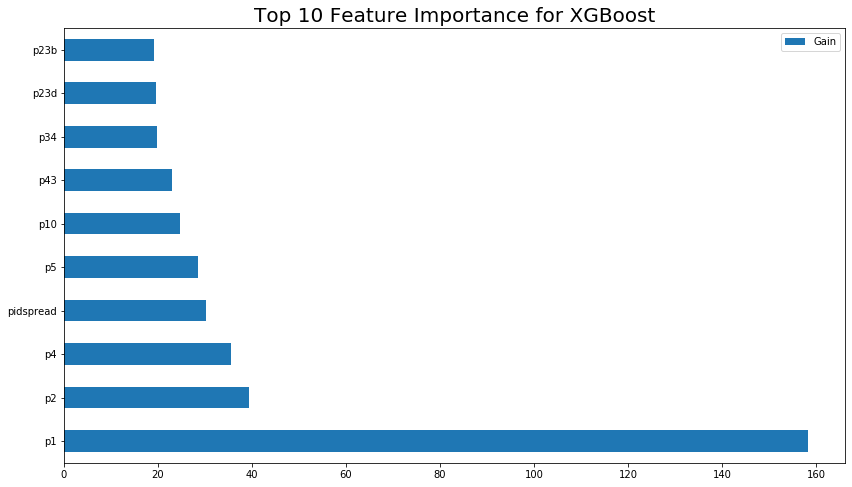

In [46]:
# display horizontal bar chart
gain_importance.plot(kind='barh', figsize=(14,8))
plt.title('Top 10 Feature Importance for XGBoost', fontsize=20)
plt.yticks(np.arange(10), ['p1', 'p2', 'p4', 'pidspread', 'p5', 'p10', 'p43', 'p34', 'p23d', 'p23b'])

In [57]:
# predict on test
predict_test_xgb = xgb_c.predict(X_test)

In [58]:
# append prediction on test set
test_all['Prediction_XGB'] = predict_test_xgb

In [59]:
test_all

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB
66788,classics,publisher,10,4,9,184535989,"['p3a', 'p1', 'p3a', 'p1', 'p5', 'p5', 'p1', '...",3,0,0,...,3,0,0,0,0,0,0,2,1,0
310672,toast,burner,4,2,4,162571639,"['p5', 'p3a', 'p5']",0,0,0,...,2,0,0,0,0,0,0,2,2,1
13527,al,republic,1,1,1,141387873,['p8a'],0,0,0,...,0,0,0,1,0,0,0,2,2,1
58070,castle,joke,13,4,12,493248020,"['p8ap8b', 'p8ap8c', 'p8b', 'p8a', 'p8a', 'p8a...",0,0,0,...,0,0,0,7,4,1,0,2,2,2
71702,currier,printmaker,2,2,2,245326607,"['p5', 'p8b']",0,0,0,...,1,0,0,0,1,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159151,kaleidoscope,album,14,4,13,68064313,"['p5', 'p8a', 'p8a', 'p3a', 'p8a', 'p8a', 'p8b...",0,0,0,...,2,0,0,7,2,0,0,2,2,1
141128,hominy,type,7,3,7,500423263,"['p2p8ap3a', 'p8a', 'p8a', 'p8a']",0,0,0,...,0,0,0,4,0,0,0,2,2,2
227194,peak,protein,8,8,7,6458294,"['p25', 'p38', 'p1', 'p28d', 'p8a', 'p23a', 'p...",1,0,0,...,0,0,0,1,1,0,0,2,2,2
328857,washburn,statement,1,1,1,183185487,['p3a'],0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [60]:
# frequency / pldspread
test_all['Occurence_In_Text'] = test_all['frequency'] / test_all['pldspread']

In [87]:
# show whether a pattern was really learned
all_zero = test_all[(test_all['Prediction'] == 0) &
         (test_all['label'] == 0) &
         (test_all['Prediction_XGB'] == 0)]

In [62]:
test_all[(test_all['Prediction'] == 0) &
         (test_all['label'] == 0) &
         (test_all['Prediction_XGB'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
348120,zebra,species,432,23,333,225199835,"['p6p5p4p1p10p20bp3a', 'p5p23cp23dp2p1p8ap3a',...",27,2,0,...,1,0,14,3,15,0,0,0,0,1.297297
348040,distributor,agent,162,8,74,414096733,"['p36p5p4p1p20dp8ap3a', 'p4', 'p8a', 'p1p8a', ...",12,0,0,...,0,0,10,0,0,0,0,0,0,2.189189
347947,burglar,criminal,157,9,119,47909601,"['p5p4p23dp2p1p8ap3a', 'p4', 'p1p8b', 'p3a', '...",25,0,0,...,0,0,2,3,0,0,0,0,0,1.319328
347980,museum,building,2549,42,1541,104361281,['p5p4p2p1p10p12ap8ap8cp8bp21ap22ap23ep23ap21c...,183,14,1,...,1,2,633,38,5,0,0,0,0,1.654121
348018,macaw,bird,381,22,260,202818911,"['p5p4p23dp2p1p25p21dp20dp8ap28bp3a', 'p5p4p23...",39,2,0,...,0,0,54,2,2,0,0,0,0,1.465385
347950,child,person,8557,44,3480,162337557,['p7p6p5p4p2p1p43p26p15ap25p15bp24p20cp20bp20d...,153,23,1,...,38,1,613,131,21,8,0,0,0,2.458908
348061,judge,person,1328,30,667,158184735,['p6p5p4p2p1p10p8ap8bp43p36p26p16p13p23ap25p23...,56,25,1,...,12,0,132,51,5,0,0,0,0,1.991004
348107,synagogue,place,1026,19,617,16354862,"['p6p5p4p1p8ap27bp3a', 'p6p26p5p4p1p23ap23bp8a...",71,0,0,...,2,0,80,41,11,2,0,0,0,1.662885
348084,prison,place,2196,33,1196,120701185,['p6p5p4p1p10p8ap8cp12cp8bp43p26p16p15ap23ap25...,89,14,0,...,2,1,422,94,45,9,0,0,0,1.836120
348057,hotel,place,13578,46,4888,373612458,['p7p6p5p4p2p1p43p26p15ap25p20cp20bp20dp27bp20...,376,31,1,...,10,9,4309,570,76,8,0,0,0,2.777823


In [64]:
test_all[(test_all['Prediction'] == 1) &
         (test_all['label'] == 0) &
         (test_all['Prediction_XGB'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
347985,polysaccharide,biomolecule,29,5,11,507825676,"['p4p1p10', 'p1', 'p5', 'p27a', 'p5', 'p5', 'p...",4,1,0,...,0,0,0,0,0,0,0,1,1,2.636364
348043,embargo,event,115,8,58,34715352,"['p1', 'p1', 'p5p3a', 'p4p3a', 'p1', 'p5p1', '...",8,0,0,...,0,0,2,4,0,0,0,1,1,1.982759
348086,programmer,agent,3,2,3,475087145,"['p16', 'p5', 'p5']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
347963,estrogen,drug,155,13,113,380709450,"['p16p5p4p1p23ap3a', 'p5p1', 'p26p5p3a', 'p5',...",5,0,0,...,0,0,7,1,0,0,0,1,1,1.371681
348117,wigeon,species,42,10,26,440389462,"['p5p10p20dp3a', 'p5p1p10', 'p5p20d', 'p20dp3a...",3,3,0,...,0,0,1,0,0,0,0,1,1,1.615385
348078,pepper,species,104,13,75,442271121,"['p5p2p1p10p8a', 'p5p1p8a', 'p5p1p3a', 'p5p3a'...",6,3,1,...,0,0,13,1,0,1,0,1,1,1.386667
347992,rotifer,animal,48,10,40,269849857,"['p5p10', 'p5p1', 'p5', 'p5', 'p20b', 'p21dp3a...",2,1,0,...,0,0,1,0,1,0,0,1,1,1.200000
348114,v-weapon,weapon,2,1,2,480436345,['p5'],0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
348027,ambassador,person,139,16,114,253702836,"['p26p5p4p1p8ap8bp3a', 'p8c', 'p8a', 'p8a', 'p...",15,3,0,...,0,2,30,5,1,0,0,1,1,1.219298
348013,progestogen,drug,6,3,6,354966832,"['p5', 'p14', 'p5', 'p3a']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000


In [65]:
test_all[(test_all['Prediction'] == 2) &
         (test_all['label'] == 0) &
         (test_all['Prediction_XGB'] == 2)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
348108,teal,animal,4,4,4,310676819,"['p8a', 'p23d', 'p3a', 'p5']",0,0,0,...,0,0,1,0,0,0,0,2,2,1.000000
348112,trojan,agent,7,5,6,113916569,"['p8b', 'p20c', 'p3a', 'p8a', 'p8a', 'p16']",0,0,0,...,0,0,2,1,0,0,0,2,2,1.166667
348067,maverick,agent,1,1,1,357024431,['p8b'],0,0,0,...,0,0,0,1,0,0,0,2,2,1.000000
348100,skipjack,place,1,1,1,363969300,['p3a'],0,0,0,...,0,0,0,0,0,0,0,2,2,1.000000
348038,cultivar,species,93,17,67,343709908,"['p4p25p1p27ap3a', 'p28d', 'p3a', 'p3a', 'p28d...",11,0,0,...,1,0,5,0,2,0,0,2,2,1.388060
348049,fraudster,person,3,3,3,134487034,"['p21a', 'p27b', 'p4']",0,0,0,...,0,0,0,0,0,0,0,2,2,1.000000
348037,culvert,watercourse,2,2,2,64555760,"['p2', 'p3a']",0,0,0,...,0,0,0,0,0,0,0,2,2,1.000000
348111,therizinosaur,species,1,1,1,478064054,['p3a'],0,0,0,...,0,0,0,0,0,0,0,2,2,1.000000
348023,11,place,25,5,13,464136512,"['p8a', 'p8a', 'p15a', 'p8b', 'p8c', 'p8a', 'p...",0,0,0,...,0,0,10,1,2,0,0,2,2,1.923077
348031,astrophysicist,person,5,3,3,53979392,"['p5', 'p43', 'p8a']",0,0,0,...,0,0,1,0,0,0,0,2,2,1.666667


In [88]:
# show whether a pattern was really learned
all_one = test_all[(test_all['Prediction'] == 1) &
         (test_all['label'] == 1) &
         (test_all['Prediction_XGB'] == 1)]

In [66]:
test_all[(test_all['Prediction'] == 1) &
         (test_all['label'] == 1) &
         (test_all['Prediction_XGB'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
343151,acetone,product,87,13,58,438897111,"['p5p23ep4p23dp1p25p8ap20ap3a', 'p5p3a', 'p5',...",10,0,0,...,0,0,17,0,0,0,1,1,1,1.500000
346611,socialism,movement,311,18,203,411869062,"['p5p1p10p8ap8bp3a', 'p5p8ap8bp3a', 'p10p8ap8b...",17,10,1,...,0,0,57,47,0,0,1,1,1,1.532020
347473,paveway,bomb,11,3,11,74204520,"['p5p1p8a', 'p5', 'p8a', 'p5', 'p8a', 'p8a', '...",1,0,0,...,0,0,5,0,0,0,1,1,1,1.000000
345337,leicestershire,place,10,3,5,131211868,"['p5p1', 'p16', 'p1', 'p16', 'p5', 'p16']",2,0,0,...,0,0,0,0,0,0,1,1,1,2.000000
342558,lactulose,laxative,90,9,70,413339434,"['p5p4p1p25p8ap3a', 'p5p8ap27a', 'p5', 'p5p8a'...",1,0,0,...,0,0,10,0,0,0,1,1,1,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344694,guillotine,device,46,7,37,254039136,"['p5p8ap8bp3a', 'p8ap8b', 'p5', 'p1', 'p8a', '...",2,0,0,...,0,0,9,7,0,0,1,1,1,1.243243
345785,ncsy,group,5,1,5,85612753,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,0,0,0,0,0,1,1,1,1.000000
342135,acetylacetone,ligand,7,1,4,53333662,"['p5', 'p5', 'p5', 'p5']",0,0,0,...,0,0,0,0,0,0,1,1,1,1.750000
342592,methanethiol,thiol,5,2,5,68294175,"['p5p25', 'p5']",0,0,0,...,0,0,0,0,0,0,1,1,1,1.000000


In [67]:
test_all[(test_all['Prediction'] == 0) &
         (test_all['label'] == 1) &
         (test_all['Prediction_XGB'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
343896,christmas,day,3515,38,2073,486523030,['p6p5p4p2p1p12ap12cp43p26p25p20cp20bp20dp27bp...,47,15,4,...,6,0,432,200,7,5,1,0,0,1.695610
347652,injector,component,303,21,186,183147055,"['p7p5p4p1p23ap27bp8bp3a', 'p5p1p10p3a', 'p5p4...",43,1,0,...,2,2,11,1,10,0,1,0,0,1.629032
343784,bull,animal,799,33,548,300981265,['p7p6p5p4p2p1p10p8ap8bp43p26p16p23dp25p23bp11...,67,5,1,...,3,2,67,16,2,3,1,0,0,1.458029
346120,poultry,bird,380,21,219,75846531,"['p6p5p4p2p1p26p16p34p23dp23ap25p24p28bp3a', '...",40,1,0,...,1,0,0,0,2,0,1,0,0,1.735160
343795,bus,place,916,35,630,471062134,['p6p5p4p1p8ap8cp8bp43p21ap26p16p34p14p23ap25p...,85,6,1,...,3,0,118,30,16,6,1,0,0,1.453968
342695,penguin,seabird,181,8,120,438699876,"['p26p5p23dp1p3a', 'p1', 'p1p3a', 'p1', 'p1p8a...",42,0,0,...,0,0,3,0,0,0,1,0,0,1.508333
346140,police,organization,1222,28,807,69315757,['p6p5p4p2p1p10p8ap8cp43p8bp26p15ap23dp20ap3a'...,182,4,0,...,4,0,110,13,44,2,1,0,0,1.514250
346944,tricycle,toy,110,12,91,348581310,"['p6p5p4p23dp1p3a', 'p5p4p2', 'p5p1', 'p3a', '...",24,0,0,...,1,1,4,0,1,0,1,0,0,1.208791
345031,journal,periodical,1536,22,937,245444197,"['p5p4p2p15ap1p21dp10p8ap28dp3a', 'p5p39p1p12a...",226,24,0,...,0,1,26,2,0,0,1,0,0,1.639274
342975,stewardship,resource,65,9,60,461703568,"['p15ap1', 'p1p28d', 'p8a', 'p1', 'p1', 'p1', ...",32,0,0,...,0,0,8,1,0,0,1,0,0,1.083333


In [68]:
test_all[(test_all['Prediction'] == 2) &
         (test_all['label'] == 1) &
         (test_all['Prediction_XGB'] == 2)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
344481,franeker,settlement,1,1,1,182411213,['p4'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
345213,kodocha,work,1,1,1,70742556,['p21b'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
345562,mirkwood,forest,11,6,8,485432957,"['p21ap8b', 'p5', 'p2', 'p8a', 'p12a', 'p5']",0,0,0,...,0,0,1,1,0,0,1,2,2,1.375
342496,idli,dumpling,1,1,1,457297295,['p28a'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
346327,rock-wallaby,animal,2,2,2,82316921,"['p8c', 'p8a']",0,0,0,...,0,0,1,0,1,0,1,2,2,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343753,brauchitsch,group,1,1,1,414570512,['p3a'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
344293,endemism,species,2,1,2,341713922,"['p15a', 'p15a']",0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
347545,retapamulin,antibiotic,1,1,1,312950217,['p15a'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
347672,paya,agent,1,1,1,93457556,['p8b'],0,0,0,...,0,0,0,1,0,0,1,2,2,1.000


In [70]:
test_all[(test_all['Prediction'] == 1) &
         (test_all['label'] == 2) &
         (test_all['Prediction_XGB'] == 1)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
326888,voltaire,rationalist,10,3,10,83802152,"['p5', 'p2', 'p5', 'p5', 'p5', 'p1', 'p5']",1,0,0,...,0,0,0,0,0,0,2,1,1,1.000000
258647,ribose,nutrient,19,3,7,106070290,"['p8a', 'p8a', 'p8a', 'p1', 'p20c', 'p8a', 'p8a']",1,0,0,...,0,0,5,0,0,0,2,1,1,2.714286
156167,jihad,settler,3,1,3,221333985,['p5'],0,0,0,...,0,0,0,0,0,0,2,1,1,1.000000
270967,schwarzkopf,brand,23,4,16,415080993,"['p5p8ap3a', 'p5p8a', 'p8c', 'p5', 'p5', 'p8a'...",0,0,0,...,0,0,11,0,1,0,2,1,1,1.437500
302233,takaful,concept,16,1,13,434894643,"['p8a', 'p8a', 'p8a', 'p8a', 'p8a', 'p8a', 'p8...",0,0,0,...,0,0,8,0,0,0,2,1,1,1.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237510,potentiometer,ratio,2,1,2,142360731,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,2,1,1,1.000000
232569,pi,paradox,3,1,2,29569130,['p1'],1,0,0,...,0,0,0,0,0,0,2,1,1,1.500000
284499,source,route,184,19,52,118630135,"['p20ap3a', 'p8d', 'p21a', 'p27b', 'p5', 'p27b...",3,0,0,...,0,0,13,3,0,1,2,1,1,3.538462
103922,fantom,project,2,1,2,444688527,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,2,1,1,1.000000


In [71]:
test_all[(test_all['Prediction'] == 0) &
         (test_all['label'] == 2) &
         (test_all['Prediction_XGB'] == 0)]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
100421,experience,technique,426,31,308,193280854,['p2p1p12ap8ap8cp21ap23dp23ap23bp20cp28ap20dp2...,131,5,1,...,0,0,48,4,7,0,2,0,0,1.383117
219373,orange,county,265,16,177,386283087,"['p26p5p4p23dp1p25p10p3a', 'p5p1p3a', 'p2p3a',...",17,2,0,...,0,0,16,4,0,0,2,0,0,1.497175
5322,t,type,1766,38,433,215816730,"['p5p4p2p1p10p8ap8bp26p34p23dp15bp25p20cp3a', ...",39,2,1,...,0,1,496,10,10,2,2,0,0,4.078522
207909,news,station,736,30,442,7600207,"['p7p26p5p2p1p23ap21dp23bp12cp3a', 'p26p5p1p25...",83,1,0,...,0,2,98,9,5,4,2,0,0,1.665158
113113,friends,constellation,6,1,3,145389258,"['p1', 'p1', 'p1', 'p1', 'p1']",5,0,0,...,0,0,0,0,0,0,2,0,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149174,industry,organization,1735,37,1121,321871045,['p6p5p4p2p1p12ap8ap12bp8cp43p26p34p14p15ap23d...,337,6,0,...,5,1,136,2,8,0,2,0,0,1.547725
208585,nepa,law,187,9,84,129100648,"['p6p26p5p4p1p8ap3a', 'p26p5p23dp1p3a', 'p5p1p...",15,0,0,...,1,0,16,0,0,0,2,0,0,2.226190
174425,list,root,87,8,15,166555943,"['p8a', 'p8a', 'p3a', 'p3a', 'p3a', 'p3a', 'p3...",2,0,0,...,0,0,6,0,1,0,2,0,0,5.800000
154787,javascript,technology,1582,31,881,399701611,['p7p6p5p4p1p10p12ap8ap8cp26p23cp23ap11p23bp20...,122,4,1,...,3,3,62,1,1,0,2,0,0,1.795687


In [89]:
# show whether a pattern was really learned
all_two = test_all[(test_all['Prediction'] == 2) &
         (test_all['label'] == 2) &
         (test_all['Prediction_XGB'] == 2)]

In [90]:
# get mean metrics for frequency, pldapread an occurence
all_zero_chart = all_zero[['frequency', 'pldspread', 'Occurence_In_Text']]
all_zero_chart = pd.DataFrame(all_zero_chart.mean()).reset_index()
all_zero_chart.columns = ['Metric', 'Value']
all_zero_chart['Class'] = ['Subclass'] * 3
all_zero_chart

,Metric,Value,Class
0,frequency,2115.360000,Subclass
1,pldspread,1040.720000,Subclass
2,Occurence_In_Text,1.793327,Subclass


In [91]:
# get mean metrics for frequency, pldapread an occurence
all_one_chart = all_one[['frequency', 'pldspread', 'Occurence_In_Text']]
all_one_chart = pd.DataFrame(all_one_chart.mean()).reset_index()
all_one_chart.columns = ['Metric', 'Value']
all_one_chart['Class'] = ['Type'] * 3
all_one_chart

,Metric,Value,Class
0,frequency,84.672697,Type
1,pldspread,54.794408,Type
2,Occurence_In_Text,1.567074,Type


In [92]:
# get mean metrics for frequency, pldapread an occurence
all_two_chart = all_two[['frequency', 'pldspread', 'Occurence_In_Text']]
all_two_chart = pd.DataFrame(all_two_chart.mean()).reset_index()
all_two_chart.columns = ['Metric', 'Value']
all_two_chart['Class'] = ['Negative'] * 3
all_two_chart

,Metric,Value,Class
0,frequency,9.711953,Negative
1,pldspread,7.468541,Negative
2,Occurence_In_Text,1.115680,Negative


In [102]:
# all_metrics
metrics = pd.concat([all_zero_chart,
                    all_one_chart,
                    all_two_chart])

In [103]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,2115.360000,Subclass
1,pldspread,1040.720000,Subclass
0,frequency,84.672697,Type
1,pldspread,54.794408,Type
0,frequency,9.711953,Negative
1,pldspread,7.468541,Negative


In [104]:
# one metric
metrics_one = metrics[metrics.Metric == 'Occurence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurence_In_Text,1.793327,Subclass
2,Occurence_In_Text,1.567074,Type
2,Occurence_In_Text,1.115680,Negative


(0, 2250)

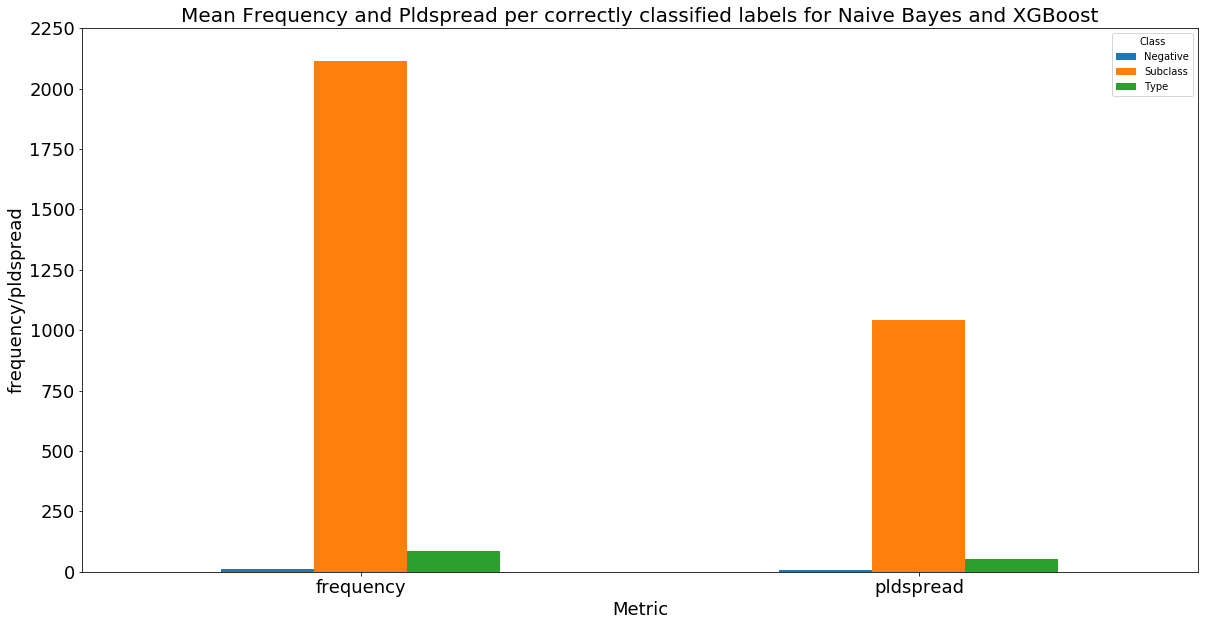

In [96]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per correctly classified labels for Naive Bayes and XGBoost',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
plt.ylim([0,2250])

(0, 2)

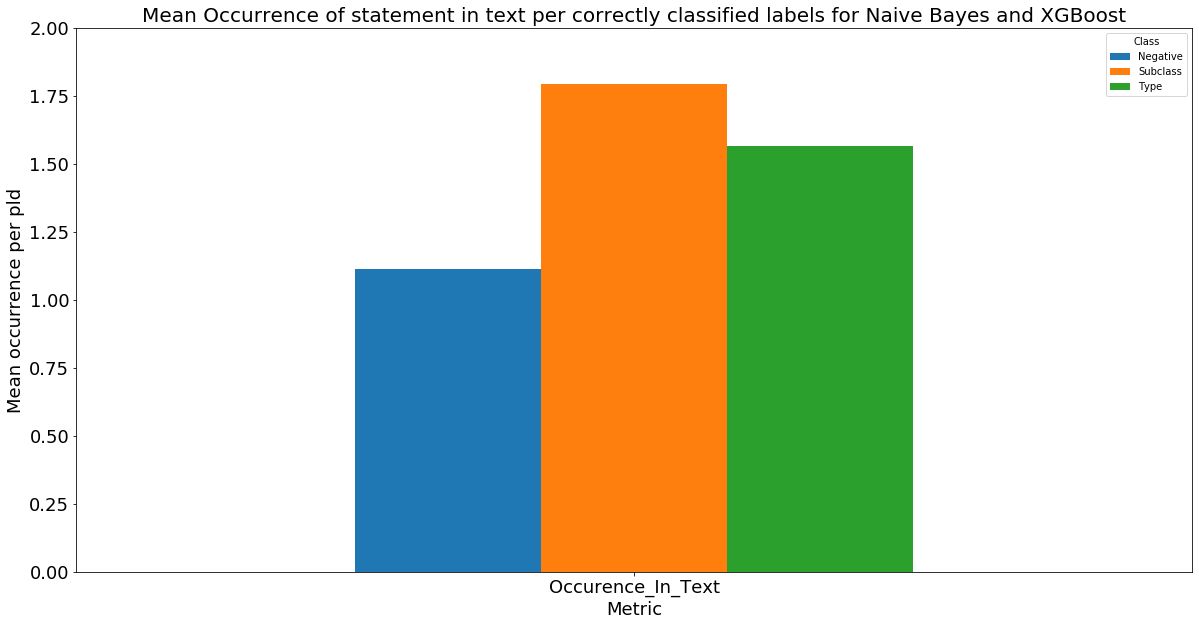

In [105]:
metrics_one.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Occurrence of statement in text per correctly classified labels for Naive Bayes and XGBoost',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('Mean occurrence per pld', fontsize=18)
plt.ylim([0,2])

# 8. Wrongly classified instances

In [72]:
# get all wrongly classified as subclasses 
both_wrong_as_subclasses_0 = test_all[(test_all['Prediction'] == 0) &
                                    (test_all['label'] == 1) &
                                    (test_all['Prediction_XGB'] == 0)]
both_wrong_as_subclasses_1 = test_all[(test_all['Prediction'] == 0) &
                                    (test_all['label'] == 2) &
                                    (test_all['Prediction_XGB'] == 0)]
both_wrong_as_subclasses = pd.concat([both_wrong_as_subclasses_0, both_wrong_as_subclasses_1])
both_wrong_as_subclasses

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
343896,christmas,day,3515,38,2073,486523030,['p6p5p4p2p1p12ap12cp43p26p25p20cp20bp20dp27bp...,47,15,4,...,6,0,432,200,7,5,1,0,0,1.695610
347652,injector,component,303,21,186,183147055,"['p7p5p4p1p23ap27bp8bp3a', 'p5p1p10p3a', 'p5p4...",43,1,0,...,2,2,11,1,10,0,1,0,0,1.629032
343784,bull,animal,799,33,548,300981265,['p7p6p5p4p2p1p10p8ap8bp43p26p16p23dp25p23bp11...,67,5,1,...,3,2,67,16,2,3,1,0,0,1.458029
346120,poultry,bird,380,21,219,75846531,"['p6p5p4p2p1p26p16p34p23dp23ap25p24p28bp3a', '...",40,1,0,...,1,0,0,0,2,0,1,0,0,1.735160
343795,bus,place,916,35,630,471062134,['p6p5p4p1p8ap8cp8bp43p21ap26p16p34p14p23ap25p...,85,6,1,...,3,0,118,30,16,6,1,0,0,1.453968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149174,industry,organization,1735,37,1121,321871045,['p6p5p4p2p1p12ap8ap12bp8cp43p26p34p14p15ap23d...,337,6,0,...,5,1,136,2,8,0,2,0,0,1.547725
208585,nepa,law,187,9,84,129100648,"['p6p26p5p4p1p8ap3a', 'p26p5p23dp1p3a', 'p5p1p...",15,0,0,...,1,0,16,0,0,0,2,0,0,2.226190
174425,list,root,87,8,15,166555943,"['p8a', 'p8a', 'p3a', 'p3a', 'p3a', 'p3a', 'p3...",2,0,0,...,0,0,6,0,1,0,2,0,0,5.800000
154787,javascript,technology,1582,31,881,399701611,['p7p6p5p4p1p10p12ap8ap8cp26p23cp23ap11p23bp20...,122,4,1,...,3,3,62,1,1,0,2,0,0,1.795687


In [73]:
# get all wrongly classified as types 
both_wrong_as_types_0 = test_all[(test_all['Prediction'] == 1) &
                                    (test_all['label'] == 0) &
                                    (test_all['Prediction_XGB'] == 1)]
both_wrong_as_types_1 = test_all[(test_all['Prediction'] == 1) &
                                    (test_all['label'] == 2) &
                                    (test_all['Prediction_XGB'] == 1)]
both_wrong_as_types = pd.concat([both_wrong_as_types_0, both_wrong_as_types_1])
both_wrong_as_types

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
347985,polysaccharide,biomolecule,29,5,11,507825676,"['p4p1p10', 'p1', 'p5', 'p27a', 'p5', 'p5', 'p...",4,1,0,...,0,0,0,0,0,0,0,1,1,2.636364
348043,embargo,event,115,8,58,34715352,"['p1', 'p1', 'p5p3a', 'p4p3a', 'p1', 'p5p1', '...",8,0,0,...,0,0,2,4,0,0,0,1,1,1.982759
348086,programmer,agent,3,2,3,475087145,"['p16', 'p5', 'p5']",0,0,0,...,0,0,0,0,0,0,0,1,1,1.000000
347963,estrogen,drug,155,13,113,380709450,"['p16p5p4p1p23ap3a', 'p5p1', 'p26p5p3a', 'p5',...",5,0,0,...,0,0,7,1,0,0,0,1,1,1.371681
348117,wigeon,species,42,10,26,440389462,"['p5p10p20dp3a', 'p5p1p10', 'p5p20d', 'p20dp3a...",3,3,0,...,0,0,1,0,0,0,0,1,1,1.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237510,potentiometer,ratio,2,1,2,142360731,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,2,1,1,1.000000
232569,pi,paradox,3,1,2,29569130,['p1'],1,0,0,...,0,0,0,0,0,0,2,1,1,1.500000
284499,source,route,184,19,52,118630135,"['p20ap3a', 'p8d', 'p21a', 'p27b', 'p5', 'p27b...",3,0,0,...,0,0,13,3,0,1,2,1,1,3.538462
103922,fantom,project,2,1,2,444688527,"['p5', 'p5']",0,0,0,...,0,0,0,0,0,0,2,1,1,1.000000


In [74]:
# get all wrongly classified as negatives 
both_wrong_as_negatives_0 = test_all[(test_all['Prediction'] == 2) &
                                    (test_all['label'] == 1) &
                                    (test_all['Prediction_XGB'] == 2)]
both_wrong_as_negatives_1 = test_all[(test_all['Prediction'] == 2) &
                                    (test_all['label'] == 0) &
                                    (test_all['Prediction_XGB'] == 2)]
both_wrong_as_negatives = pd.concat([both_wrong_as_negatives_0, both_wrong_as_negatives_1])
both_wrong_as_negatives

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p6,p7,p8a,p8b,p8c,p8d,label,Prediction,Prediction_XGB,Occurence_In_Text
344481,franeker,settlement,1,1,1,182411213,['p4'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
345213,kodocha,work,1,1,1,70742556,['p21b'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
345562,mirkwood,forest,11,6,8,485432957,"['p21ap8b', 'p5', 'p2', 'p8a', 'p12a', 'p5']",0,0,0,...,0,0,1,1,0,0,1,2,2,1.375
342496,idli,dumpling,1,1,1,457297295,['p28a'],0,0,0,...,0,0,0,0,0,0,1,2,2,1.000
346327,rock-wallaby,animal,2,2,2,82316921,"['p8c', 'p8a']",0,0,0,...,0,0,1,0,1,0,1,2,2,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348081,picatharte,species,1,1,1,217656944,['p3a'],0,0,0,...,0,0,0,0,0,0,0,2,2,1.000
348017,fascist,anti-communist,1,1,1,124618216,['p23d'],0,0,0,...,0,0,0,0,0,0,0,2,2,1.000
347945,brigantine,ship,7,5,7,503209001,"['p34p23dp8a', 'p8b', 'p3a']",0,0,0,...,0,0,1,1,0,0,0,2,2,1.000
348058,impostor,agent,2,2,2,360630533,"['p2', 'p8a']",0,0,0,...,0,0,1,0,0,0,0,2,2,1.000


In [77]:
# get mean metrics for frequency, pldapread an occurence
both_wrong_as_subclasses = both_wrong_as_subclasses[['frequency', 'pldspread', 'Occurence_In_Text']]
both_wrong_as_subclasses = pd.DataFrame(both_wrong_as_subclasses.mean()).reset_index()
both_wrong_as_subclasses.columns = ['Metric', 'Value']
both_wrong_as_subclasses['Class'] = ['Subclass'] * 3
both_wrong_as_subclasses

,Metric,Value,Class
0,frequency,1076.957265,Subclass
1,pldspread,534.996581,Subclass
2,Occurence_In_Text,1.908023,Subclass


In [78]:
# get mean metrics for frequency, pldapread an occurence
both_wrong_as_types = both_wrong_as_types[['frequency', 'pldspread', 'Occurence_In_Text']]
both_wrong_as_types = pd.DataFrame(both_wrong_as_types.mean()).reset_index()
both_wrong_as_types.columns = ['Metric', 'Value']
both_wrong_as_types['Class'] = ['Type'] * 3
both_wrong_as_types

,Metric,Value,Class
0,frequency,30.688700,Type
1,pldspread,19.627698,Type
2,Occurence_In_Text,1.550298,Type


In [79]:
# get mean metrics for frequency, pldapread an occurence
both_wrong_as_negatives = both_wrong_as_negatives[['frequency', 'pldspread', 'Occurence_In_Text']]
both_wrong_as_negatives = pd.DataFrame(both_wrong_as_negatives.mean()).reset_index()
both_wrong_as_negatives.columns = ['Metric', 'Value']
both_wrong_as_negatives['Class'] = ['Negative'] * 3
both_wrong_as_negatives

,Metric,Value,Class
0,frequency,8.172414,Subclass
1,pldspread,6.209895,Subclass
2,Occurence_In_Text,1.120602,Subclass


In [98]:
# all_metrics
metrics = pd.concat([both_wrong_as_subclasses,
                    both_wrong_as_types,
                    both_wrong_as_negatives])

In [99]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,1076.957265,Subclass
1,pldspread,534.996581,Subclass
0,frequency,30.688700,Type
1,pldspread,19.627698,Type
0,frequency,8.172414,Negative
1,pldspread,6.209895,Negative


In [100]:
# one metric
metrics_one = metrics[metrics.Metric == 'Occurence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurence_In_Text,1.908023,Subclass
2,Occurence_In_Text,1.550298,Type
2,Occurence_In_Text,1.120602,Negative


(0, 2250)

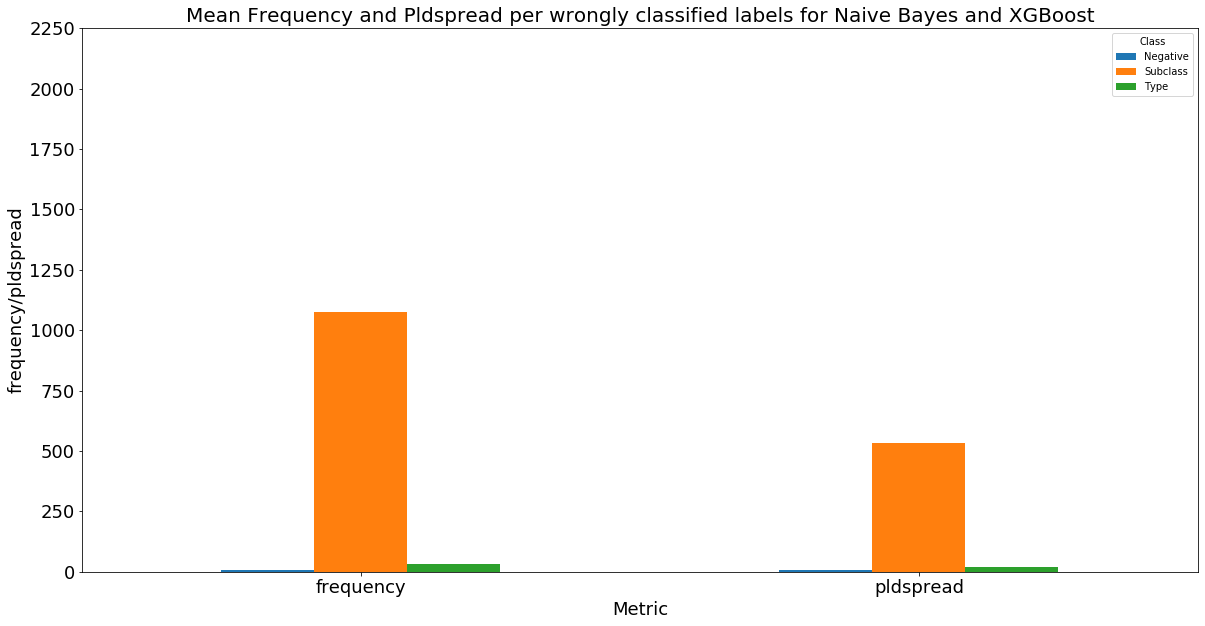

In [86]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per wrongly classified labels for Naive Bayes and XGBoost',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
plt.ylim([0,2250])

Text(0, 0.5, 'Mean occurrence per pld')

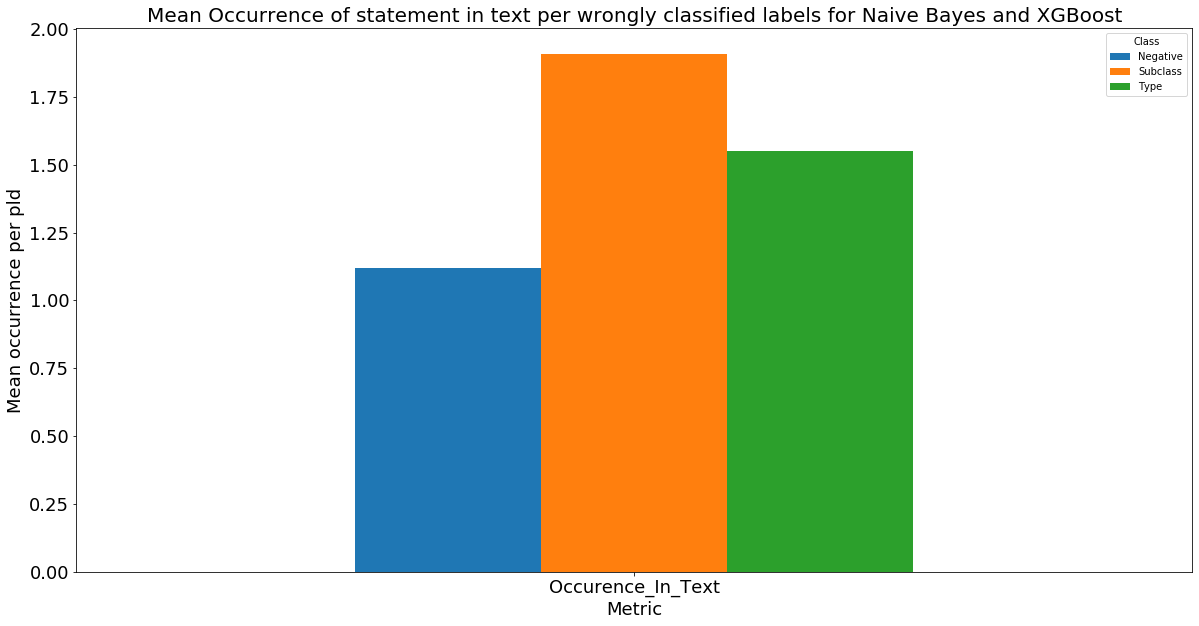

In [101]:
metrics_one.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Occurrence of statement in text per wrongly classified labels for Naive Bayes and XGBoost',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('Mean occurrence per pld', fontsize=18)